In [41]:
import pandas as pd
import sys

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append('/Users/UCRP556/code/DL/DeepLearning/')

In [6]:
%run -i '/Users/UCRP556/code/DL/DeepLearning/EDA/time_series.py'

   device_id  cycles  setting1  setting2  setting3  sensor1  sensor2  sensor3  \
0          1       1    0.0016    0.0002     100.0   518.67   642.88  1587.21   
1          1       2   24.9993    0.6215      80.0   462.54   536.45  1262.64   
2          1       3    0.0004    0.0000     100.0   518.67   642.65  1589.75   
3          1       4   10.0034    0.2500      20.0   489.05   604.44  1499.93   
4          1       5    0.0024    0.0011     100.0   518.67   642.74  1585.47   

   sensor4  sensor5  ...  sensor14  sensor15  sensor16  sensor17  sensor18  \
0  1412.44    14.62  ...   8124.04    8.4363      0.03       393      2388   
1  1055.44     7.05  ...   7865.20   10.8935      0.02       308      1915   
2  1409.54    14.62  ...   8121.12    8.4620      0.03       393      2388   
3  1315.34    10.52  ...   8123.53    8.6815      0.03       369      2319   
4  1408.12    14.62  ...   8118.30    8.4617      0.03       392      2388   

   sensor19  sensor20  sensor21  sensor22  s

/Users/UCRP556/code/DL/DeepLearning/EDA/time_series.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[sensor+'_MA'] = data[sensor].rolling(75, center=True).mean()
/Users/UCRP556/code/DL/DeepLearning/EDA/time_series.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[sensor+'_delta'] = np.log(data[sensor]/data[sensor].shift())
/Users/UCRP556/code/DL/DeepLearning/EDA/time_series.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

      device_id  cycles  sensor9
4353         31     364  8077.33
4352         31     363  8403.97
4351         31     362  8398.52
4350         31     361  9140.51
4349         31     360  8862.56



----------------------------------------------------------------------
Ran 1 test in 47.628s

OK


In [14]:
DATA_DIR = '/Users/UCRP556/data/aviation/NASA/Challenge_Data/'
FIG_DIR = '/Users/UCRP556/data/aviation/NASA/Challenge_Data/figures/'
REPORT_DIR = "/Users/UCRP556/data/aviation/NASA/Challenge_Data/reports/"

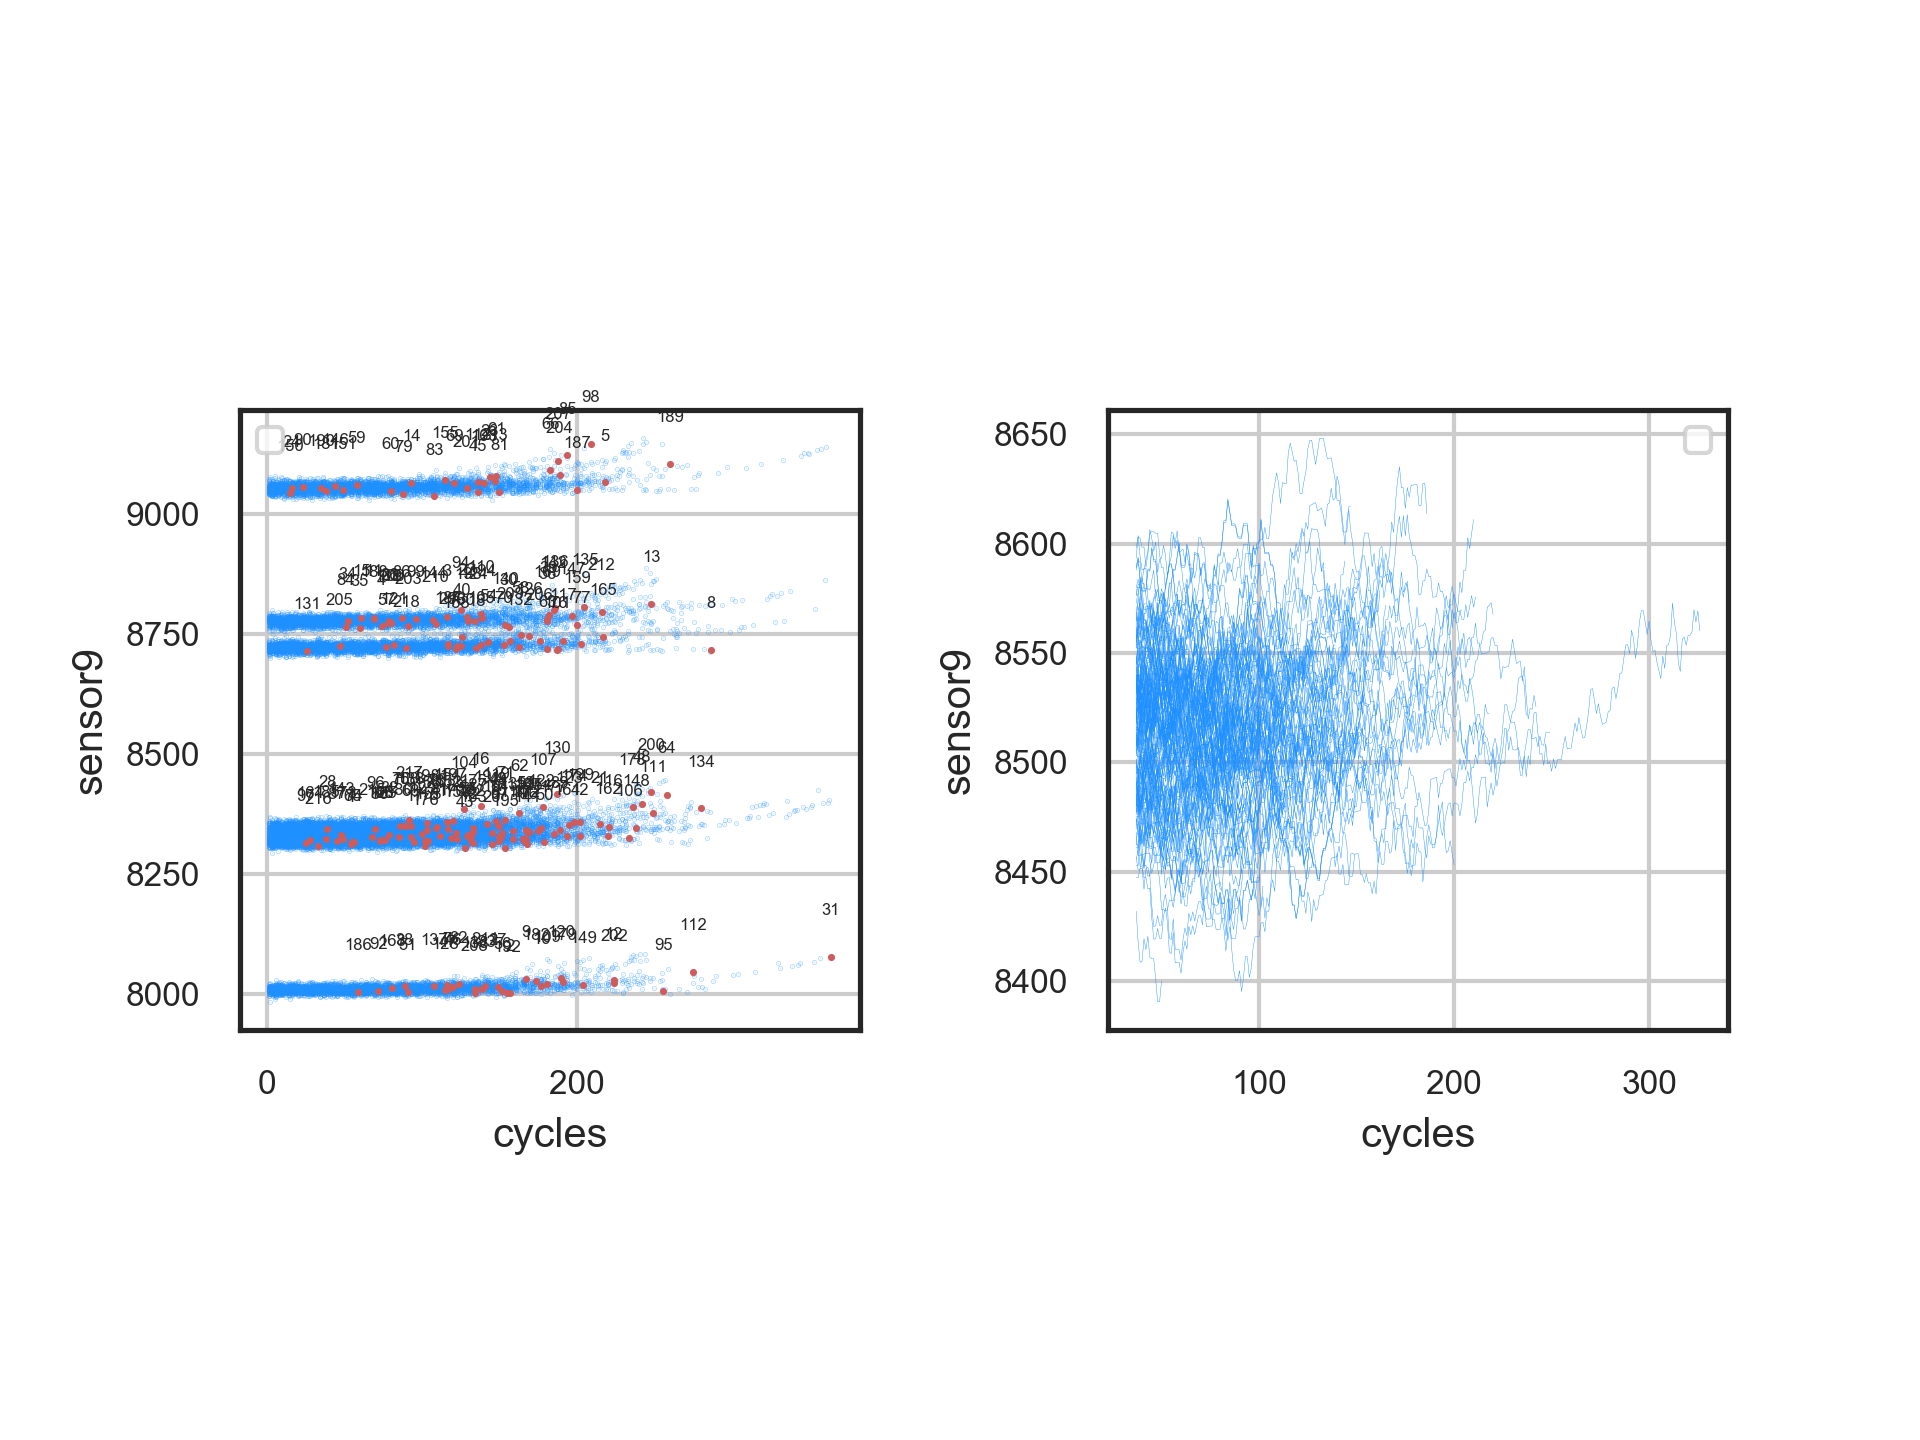

In [12]:
name = 'MLP_NASA_Challenge_RUL_sample_power_loss_a_2_4'
sensor = 'sensor9'
from IPython.display import Image
Image(filename=FIG_DIR+'fleet/'+name+'_'+sensor+'_fleet_degradation.png') 

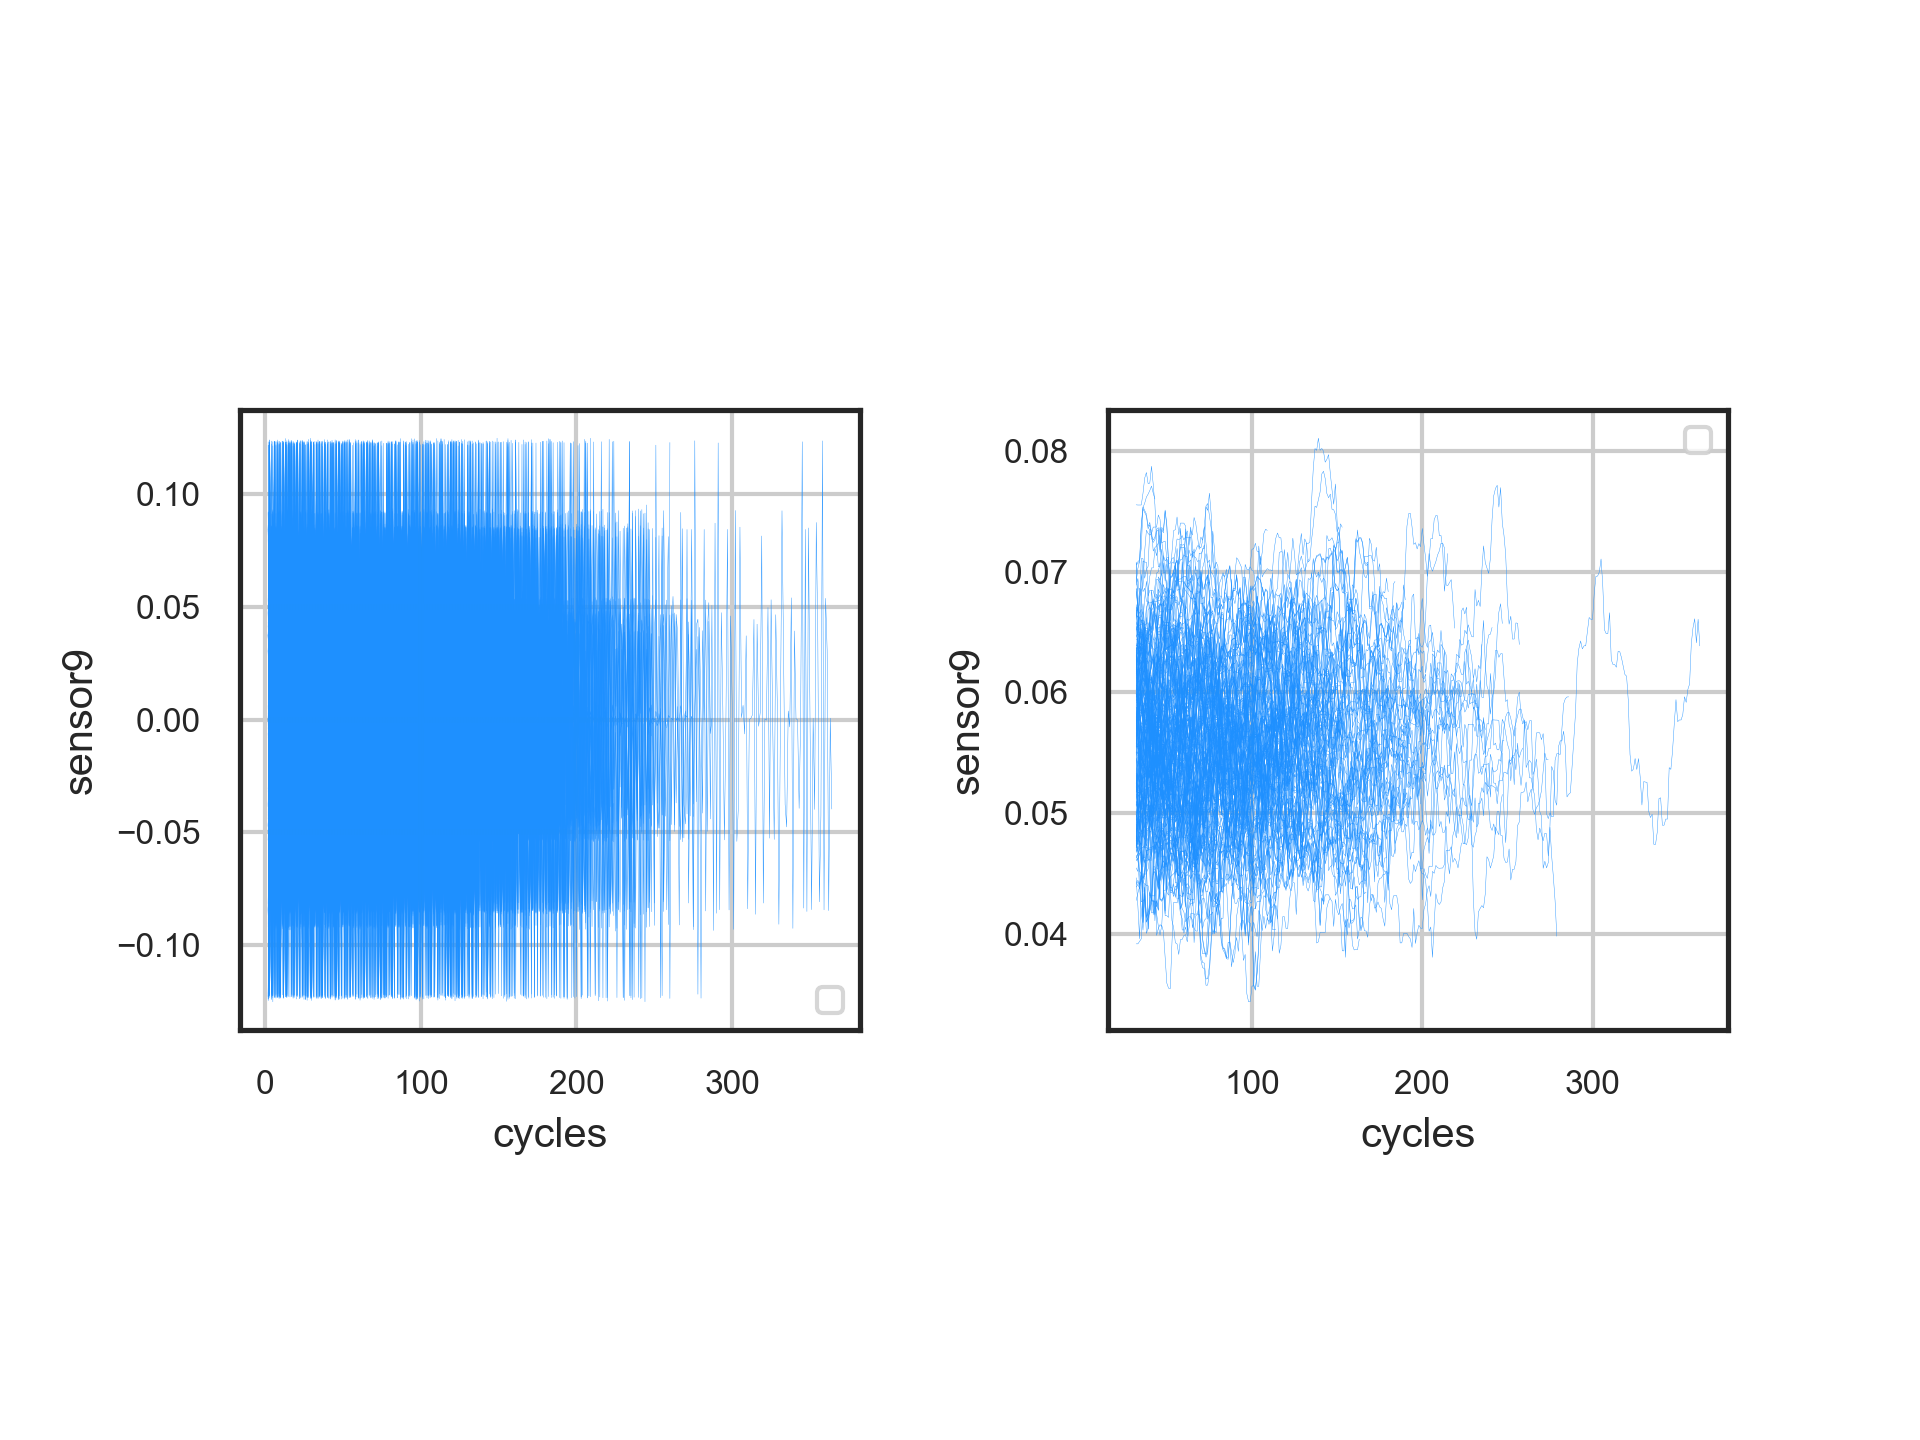

In [13]:
name = 'MLP_NASA_Challenge_RUL_sample_power_loss_a_2_4'
sensor = 'sensor9'
from IPython.display import Image
Image(filename=FIG_DIR+'fleet/'+name+'_'+sensor+'_fleet_volatility.png') 

In [15]:
df_events = pd.read_csv(REPORT_DIR+name+'_events_report.csv')

In [16]:
df_events.head(n=5)

,device_id,cycles
0,31,364
1,8,287
2,134,280
3,112,275
4,189,260


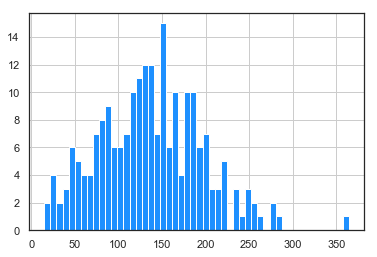

In [22]:
plt.figure()
plt.hist(df_events['cycles'].values, color='dodgerblue', bins=50)
plt.grid()

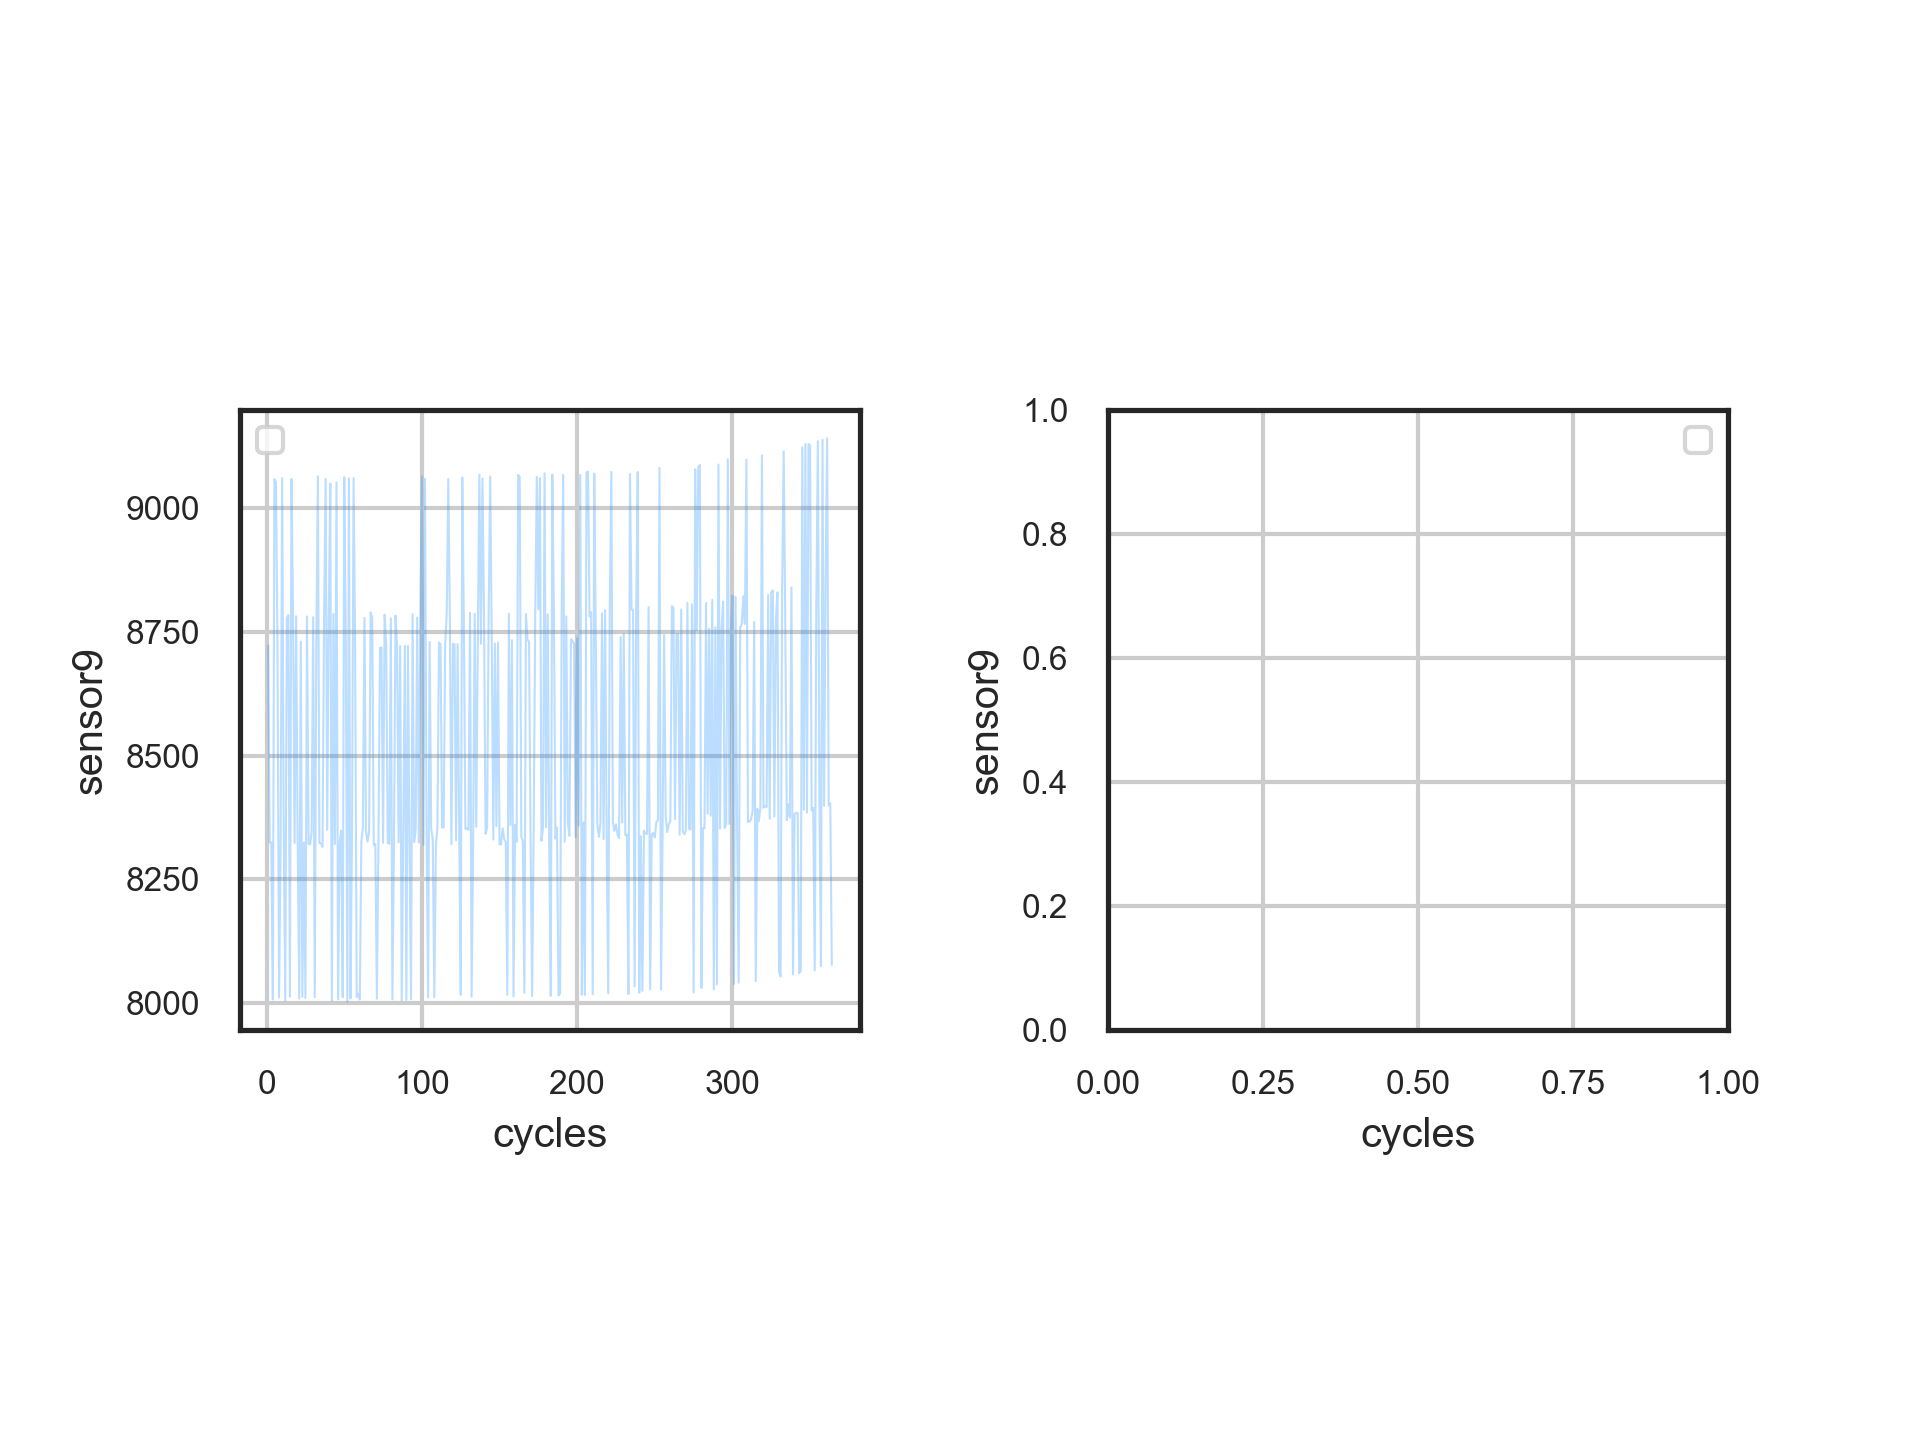

In [24]:
device_id = 31
name = 'MLP_NASA_Challenge_RUL_sample_power_loss_a_2_4'
sensor = 'sensor9'
from IPython.display import Image
Image(filename=FIG_DIR+'fleet/'+name+'_'+sensor+'_device_'+str(device_id)+'_degradation.png') 

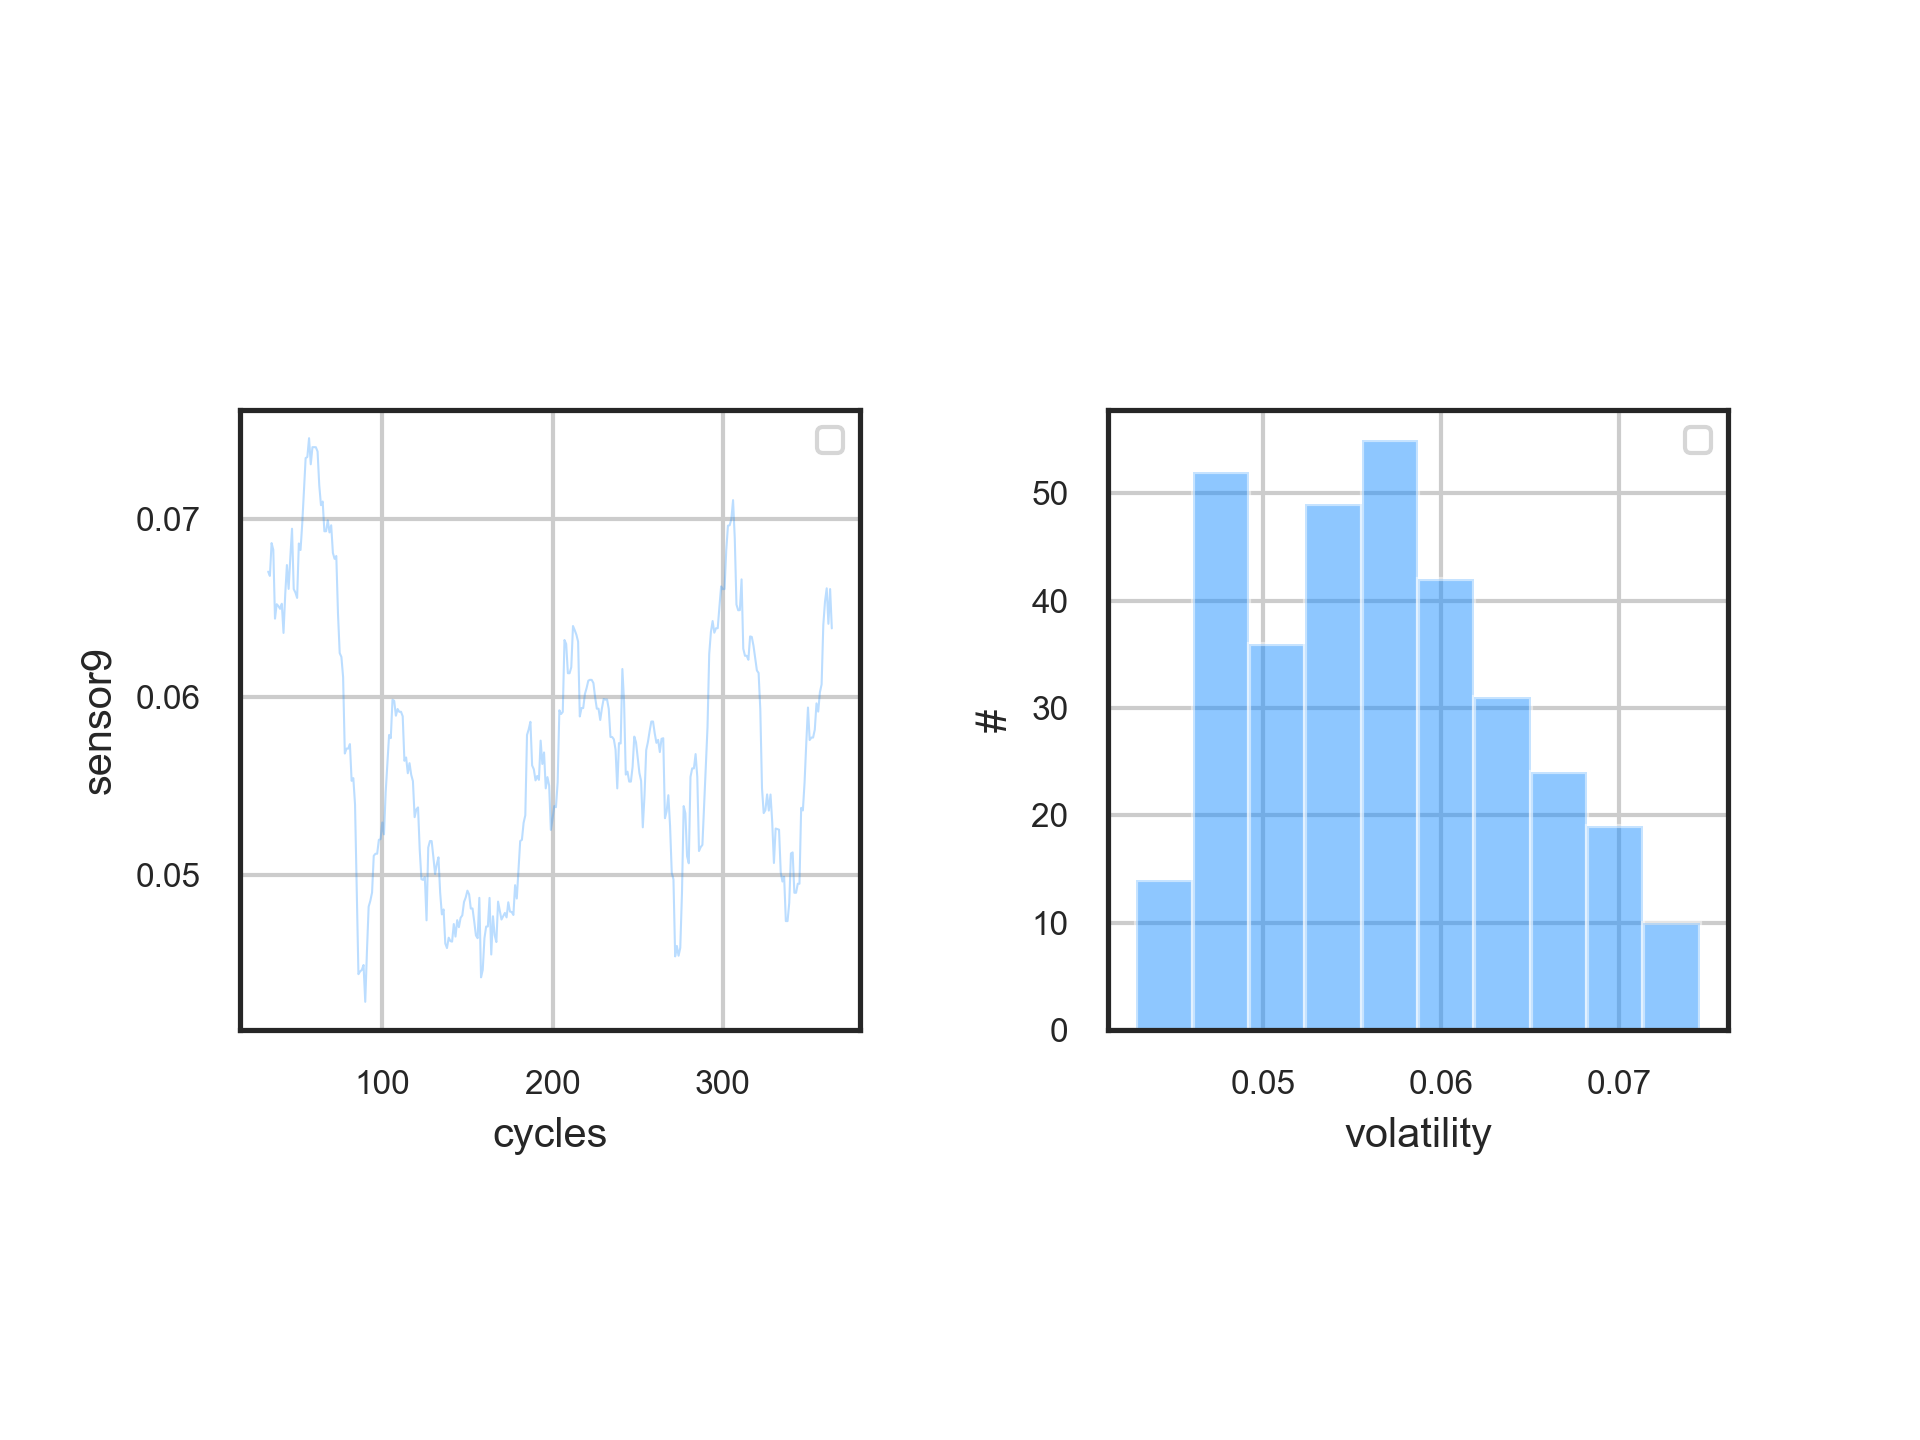

In [23]:
device_id = 31
name = 'MLP_NASA_Challenge_RUL_sample_power_loss_a_2_4'
sensor = 'sensor9'
from IPython.display import Image
Image(filename=FIG_DIR+'fleet/'+name+'_'+sensor+'_device_'+str(device_id)+'_volatility.png') 

In [31]:
test_file = DATA_DIR+'test.txt'
df = pd.read_csv(test_file, sep=' ', header=None)
columns = ['device_id', 'cycles', 'setting1', 'setting2', 'setting3']
sensors = ['sensor'+str(i+1) for i in np.arange(0, 23)]
columns += sensors
df.columns = columns
df.head(n=5)

,device_id,cycles,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,0.0016,0.0002,100.0,518.67,642.88,1587.21,1412.44,14.62,...,8124.04,8.4363,0.03,393,2388,100.00,38.97,23.3029,NaN,NaN
1,1,2,24.9993,0.6215,80.0,462.54,536.45,1262.64,1055.44,7.05,...,7865.20,10.8935,0.02,308,1915,84.93,14.29,8.6686,NaN,NaN
2,1,3,0.0004,0.0000,100.0,518.67,642.65,1589.75,1409.54,14.62,...,8121.12,8.4620,0.03,393,2388,100.00,38.91,23.2693,NaN,NaN
3,1,4,10.0034,0.2500,20.0,489.05,604.44,1499.93,1315.34,10.52,...,8123.53,8.6815,0.03,369,2319,100.00,28.60,17.0930,NaN,NaN
4,1,5,0.0024,0.0011,100.0,518.67,642.74,1585.47,1408.12,14.62,...,8118.30,8.4617,0.03,392,2388,100.00,38.82,23.3124,NaN,NaN


In [33]:
df.tail(n=5)

,device_id,cycles,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
29815,218,86,35.0013,0.8404,60.0,449.44,556.14,1367.80,1129.58,5.48,...,8065.66,9.3426,0.02,335,2223,100.00,14.62,8.8457,NaN,NaN
29816,218,87,25.0041,0.6200,80.0,462.54,536.97,1262.93,1051.83,7.05,...,7871.94,10.9421,0.02,306,1915,84.93,14.41,8.4964,NaN,NaN
29817,218,88,20.0043,0.7000,0.0,491.19,607.93,1492.15,1252.99,9.35,...,8059.65,9.2862,0.02,368,2324,100.00,24.42,14.5244,NaN,NaN
29818,218,89,20.0037,0.7000,0.0,491.19,607.85,1490.80,1254.70,9.35,...,8062.13,9.2599,0.02,365,2324,100.00,24.45,14.5694,NaN,NaN
29819,218,90,19.9987,0.7009,0.0,491.19,607.75,1485.63,1256.00,9.35,...,8059.15,9.2134,0.03,367,2324,100.00,24.61,14.6979,NaN,NaN


In [47]:
data = df[sensors]
data.dropna(inplace=True, axis=1)
print(data.shape)
kmeans = KMeans(n_clusters=6, random_state=0).fit(data)
kmeans.labels_

/Users/UCRP556/code/DL/DeepLearning/EDA/time_series.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(29820, 21)


array([3, 2, 3, ..., 1, 1, 1], dtype=int32)

In [48]:
silhouette_score(data, kmeans.labels_, metric='euclidean')

0.8511969585179447